In [3]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

import plotly
from plotly.graph_objs import *
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go


from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from collections import Counter
import sklearn

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''

  '''))
  init_notebook_mode(connected=False)

get_ipython().events.register('pre_run_cell', enable_plotly_in_cell)

from plotly.offline import iplot
import plotly.graph_objs as go

enable_plotly_in_cell()

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''


        '''))

configure_plotly_browser_state()

def get_yf_hist(symbol_list,startDate,endDate,interval):
  import matplotlib.pyplot as plt
  import datetime
  import yfinance as yf

  # Get historical pricing data
  data = yf.download(symbol_list, startDate, endDate, interval)

  return data


def get_intraday(symbol_list,period,interval):
  intraday_list = []
  intraday_df = pd.DataFrame()
  for sym in symbol_list:
    intraday = yf.download(tickers=sym,
                           period=period,
                           interval=interval)
    intraday['symbol'] = sym
    intraday_df = pd.concat([intraday_df,intraday])

  return intraday_df

def rolling_zscore(data,return_period,window_length):
  log_returns = (np.log(data / data.shift(return_period)))
  zscore = (log_returns - log_returns.rolling(window_length).mean() / log_returns.rolling(window_length).std())
  #results_dict = dict({'log_returns':log_returns})
  results_df = pd.DataFrame(zscore)

  return results_df

def format_ohlcv_df(df):
  df = df.reset_index()
  df.columns = df.columns.str.lower()
  df = df.rename(columns={'adj close':'adj_close'})
  df['ln_adj_returns'] = (np.log(df['adj_close']/df['adj_close'].shift(1)))
  df['weekday'] = pd.Series(df['date']).dt.weekday
  df['day_name'] = df['date'].dt.day_name()
  df['month_name'] = df['date'].dt.month_name()
  df['day'] = df['date'].dt.day
  df['weekday'] = df['date'].dt.weekday
  df['month'] = df['date'].dt.month
  df['year'] = df['date'].dt.year
  df['quarter'] = df['date'].dt.quarter
  df['quarter_name'] = "Q"+df['quarter'].astype(str)

  df['ohlc_median'] = df[['open','high','low','adj_close']].median(axis=1,skipna=True)
  df['ohlc_mean'] = df[['open','high','low','adj_close']].mean(axis=1,skipna=True)

  df['hl_range'] = (df['high'] - df['low'])
  df['intraday_chg'] = (df['adj_close'] - df['open'])
  df['ln_adj_returns_weekly'] = (df['adj_close'] / df['adj_close'].shift(5))

  return df

def plotly_ts_heatmap(df,z,x,y,title):

  fig = go.Figure()

  fig.add_trace(go.Heatmap(z=z,x=x,y=y,colorscale='rdylgn'))

  #fig.show()
  return fig.update_layout(title=title,template='plotly_dark')


def missing_data(data):
  # Plots a table showing the percentage of values in the dataset that are missing
  total = data.isnull().sum()
  percent = (data.isnull().sum()/data.isnull().count()*100)
  tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  types = []
  for col in data.columns:
      dtype = str(data[col].dtype)
      types.append(dtype)
  tt['Types'] = types
  return(np.transpose(tt))


def plot_feature_scatter(df1,df2, features):
  """
  Takes two dataframes and a list of feature names as strings and creates
  subplots of scatterplots
  """

  i = 0
  # sns.set_style('whitegrid)
  plt.figure()
  fig, ax = plt.subplots(4,4,figsize=(14,14))

  for feature in features:
    i += 1
    plt.subplot(4,4,i)
    plt.scatter(df1[feature],df2[feature],marker='+')
    plt.xlabel(feature,fontsize=9)
  return plt.show();


def corr_plot1(corr_data,width,height):
  #plt.style.use('dark_background') # use this if plotting in a dark themed notebook

  import numpy as np

  mask = np.zeros_like(corr_data, dtype=np.bool_)

  #mask[np.triu_indices_from(mask)] = True

  plt.subplots(figsize = (width,height))

  sns.heatmap(corr_data,
              annot=True,
              mask = mask,
              cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
              linewidths=.9,
              linecolor='gray',
              fmt='.2g',
              center = 0,
              square=True)

  plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);


def summary_stats(df):

  import pandas as pd

  stats_df = pd.DataFrame(index=df.columns)
  stats_df['mean'] = df.mean()
  stats_df['median'] = df.median()
  stats_df['variance'] = df.var(axis=0)
  stats_df['standard_deviation'] = df.std(axis=0)
  stats_df['skew'] = df.skew(axis=0)
  stats_df['kurtosis'] = df.kurtosis(axis=0)
  stats_df['data_types'] = df.dtypes
  stats_df['unique_value_count'] = df.nunique(axis=0)
  stats_df['total_null_values_in_dataset(%)'] = pd.isnull(df).sum().sort_values(ascending=False) / len(df)*100

  return stats_df


def df_colormap(val):
  """
  Takes a scalar value and colors the output based on a given set of criteria
  """
  color = 'red' if val >= 50 else 'black'
  return 'color: %s' % color

%matplotlib inline
alt.data_transformers.disable_max_rows()

ModuleNotFoundError: No module named 'appdirs'

In [2]:
def get_yf_hist(symbol_list,startDate,endDate,interval):

  # Get historical pricing data
  data = yf.download(symbol_list, startDate, endDate, interval)

  return data

In [3]:
symbol = 'TSLA'
start_date = '2020-01-01'
end_date = datetime.date.today()

#df1 = pdr.get_data_yahoo(symbol,start=start_date,end=end_date)

symbol_list = ['TSLA']

df1 = get_yf_hist(symbol_list=symbol_list,startDate=start_date,endDate=end_date,interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.0,0.0
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.0,0.0
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.0,0.0
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.0,0.0
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.0,0.0


In [5]:
symbol_list = ['NVDA','AMD']
df2 = get_yf_hist(symbol_list=symbol_list,startDate=start_date,endDate=end_date,interval='1d')

[*********************100%***********************]  2 of 2 completed


In [6]:
df2.head()

Adj Close                 Close            Dividends       \
                  AMD       NVDA        AMD       NVDA       AMD NVDA   
Date                                                                    
2020-01-02  49.099998  59.754219  49.099998  59.977501       0.0  0.0   
2020-01-03  48.599998  58.797791  48.599998  59.017502       0.0  0.0   
2020-01-06  48.389999  59.044369  48.389999  59.264999       0.0  0.0   
2020-01-07  48.250000  59.759197  48.250000  59.982498       0.0  0.0   
2020-01-08  47.830002  59.871277  47.830002  60.095001       0.0  0.0   

                 High                   Low                  Open             \
                  AMD       NVDA        AMD       NVDA        AMD       NVDA   
Date                                                                           
2020-01-02  49.250000  59.977501  46.630001  59.180000  46.860001  59.687500   
2020-01-03  49.389999  59.457500  47.540001  58.525002  48.029999  58.775002   
2020-01-06  48.860001  59.317501  47.860001  57.817501  48.020000  58.080002   
2020-01-07  49.389999  60.442501  48.040001  59.097500  49.349998  59.549999   
2020-01-08  48.299999  60.509998  47.139999  59.537498  47.849998  59.939999   

           Stock Splits         Volume            
                    AMD NVDA       AMD      NVDA  
Date                                              
2020-01-02          0.0  0.0  80331100  23753600  
2020-01-03          0.0  0.0  73127400  20538400  
2020-01-06          0.0  0.0  47934900  26263600  
2020-01-07          0.0  0.0  58061400  31485600  
2020-01-08          0.0  0.0  53767000  27710800

In [7]:
df2['Adj Close']['AMD']

Date
2020-01-02     49.099998
2020-01-03     48.599998
2020-01-06     48.389999
2020-01-07     48.250000
2020-01-08     47.830002
                 ...    
2023-08-09    110.470001
2023-08-10    110.230003
2023-08-11    107.570000
2023-08-14    111.980003
2023-08-15    111.349998
Name: AMD, Length: 911, dtype: float64

In [8]:
# Normalize the data so that all values start at 1
df2_normalized = df2/df2.iloc[0]

In [9]:
df2_normalized

Adj Close               Close           Dividends           High  \
                 AMD      NVDA       AMD      NVDA       AMD NVDA       AMD   
Date                                                                          
2020-01-02  1.000000  1.000000  1.000000  1.000000       NaN  NaN  1.000000   
2020-01-03  0.989817  0.983994  0.989817  0.983994       NaN  NaN  1.002843   
2020-01-06  0.985540  0.988120  0.985540  0.988121       NaN  NaN  0.992081   
2020-01-07  0.982688  1.000083  0.982688  1.000083       NaN  NaN  1.002843   
2020-01-08  0.974134  1.001959  0.974134  1.001959       NaN  NaN  0.980711   
...              ...       ...       ...       ...       ...  ...       ...   
2023-08-09  2.249898  7.121506  2.249898  7.094994       NaN  NaN  2.297462   
2023-08-10  2.245010  7.093725  2.245010  7.067317       NaN  NaN  2.312487   
2023-08-11  2.190835  6.837174  2.190835  6.811721       NaN  NaN  2.214619   
2023-08-14  2.280652  7.322161  2.280652  7.294902       NaN  NaN  2.273909   
2023-08-15  2.267821  7.353456  2.267821  7.326080       NaN  NaN  2.298071   

                           Low                Open           Stock Splits  \
                NVDA       AMD      NVDA       AMD      NVDA          AMD   
Date                                                                        
2020-01-02  1.000000  1.000000  1.000000  1.000000  1.000000          NaN   
2020-01-03  0.991330  1.019515  0.988932  1.024968  0.984712          NaN   
2020-01-06  0.988996  1.026378  0.976977  1.024755  0.973068          NaN   
2020-01-07  1.007753  1.030238  0.998606  1.053137  0.997696          NaN   
2020-01-08  1.008878  1.010937  1.006041  1.021127  1.004230          NaN   
...              ...       ...       ...       ...       ...          ...   
2023-08-09  7.388104  2.332833  7.119635  2.409091  7.417633          NaN   
2023-08-10  7.265057  2.347630  7.069111  2.375160  7.063456          NaN   
2023-08-11  7.005627  2.283508  6.867016  2.322877  6.994932          NaN   
2023-08-14  7.302738  2.260776  6.811591  2.278062  6.782995          NaN   
2023-08-15  7.547497  2.362642  7.385941  2.389885  7.465550          NaN   

                   Volume            
           NVDA       AMD      NVDA  
Date                                 
2020-01-02  NaN  1.000000  1.000000  
2020-01-03  NaN  0.910325  0.864644  
2020-01-06  NaN  0.596717  1.105668  
2020-01-07  NaN  0.722776  1.325509  
2020-01-08  NaN  0.669317  1.166594  
...         ...       ...       ...  
2023-08-09  NaN  0.700315  2.468885  
2023-08-10  NaN  0.713270  2.074233  
2023-08-11  NaN  0.692368  2.239698  
2023-08-14  NaN  0.714814  2.906027  
2023-08-15  NaN  0.669935  2.848040  

[911 rows x 16 columns]

<Axes: title={'center': 'AMD vs NVDA'}, xlabel='Date', ylabel='Normalized Price'>

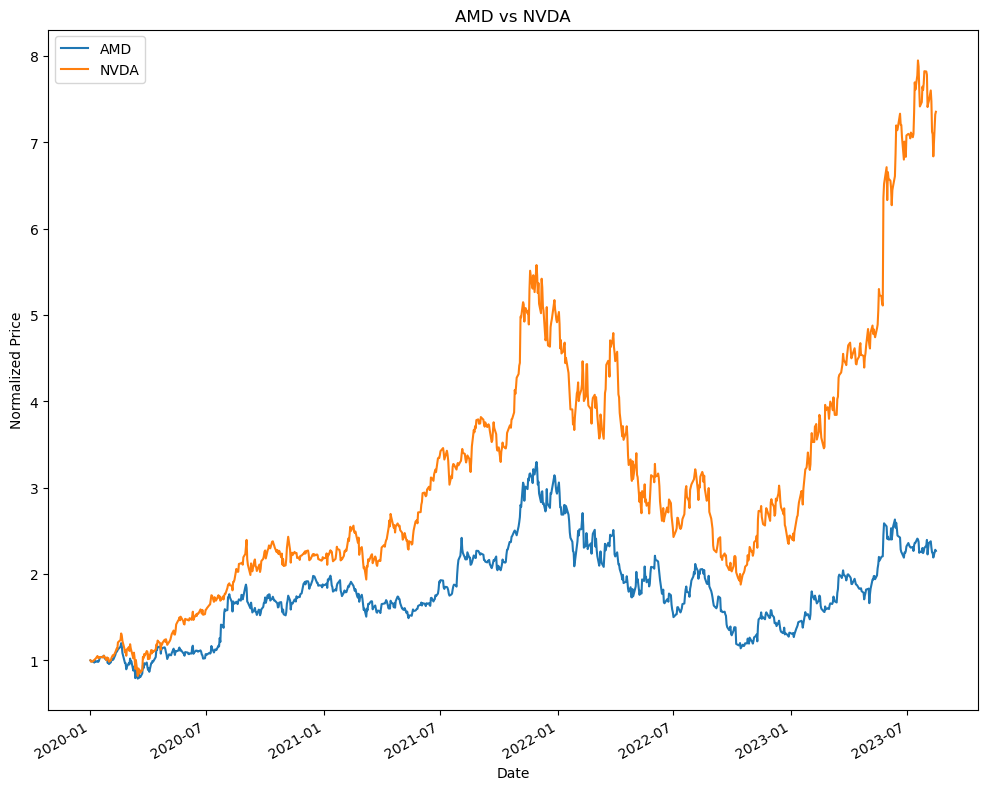

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_ylabel('Normalized Price')
df2_normalized['Adj Close'].plot(kind='line',ax=ax,title='AMD vs NVDA')

In [11]:
df1_array = df1.values # Convert to array
# slicing syntax is [row:row,col:col]
# use np.ones(n_rows,n_cols) to create a 2 dimensional array with all 1s, can specify the dtype
# use np.empty() with the same inputs to initialize an array that is empty
# use df1_array.size to return the dimensions of the array. This returns the product of number of columns X number of rows
df1_array.size

7288

<Axes: ylabel='Frequency'>

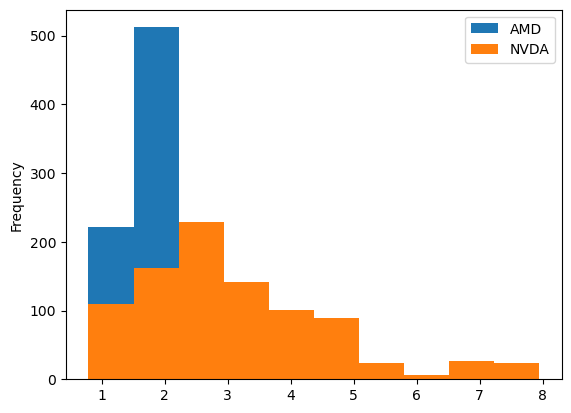

In [12]:
df2_normalized['Adj Close'].plot(kind='hist')

In [13]:
msft = yf.Ticker('MSFT')
msft_hist = msft.info

In [14]:
msft_hist

{'address1': 'One Microsoft Way',
 'city': 'Redmond',
 'state': 'WA',
 'zip': '98052-6399',
 'country': 'United States',
 'phone': '425 882 8080',
 'website': 'https://www.microsoft.com',
 'industry': 'Software—Infrastructure',
 'industryDisp': 'Software—Infrastructure',
 'sector': 'Technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Microsoft Corporation develops and supports software, services, devices and solutions worldwide. The Productivity and Business Processes segment offers office, exchange, SharePoint, Microsoft Teams, office 365 Security and Compliance, Microsoft viva, and Microsoft 365 copilot; and office consumer services, such as Microsoft 365 consumer subscriptions, Office licensed on-premises, and other office services. This segment also provides LinkedIn; and dynamics business solutions, including Dynamics 365, a set of intelligent, cloud-based applications across ERP, CRM, power apps, and power automate; and on-premises ERP and CRM applications. The Int

In [15]:
#xlf_df = yf.Ticker('XLF')
#xlf_df.get_news()

In [16]:
msft_cf = msft.get_cash_flow()

In [17]:
msft_cf

,2023-06-30,2022-06-30,2021-06-30,2020-06-30
FreeCashFlow,59475000000.0,65149000000.0,56118000000.0,45234000000.0
RepurchaseOfCapitalStock,-22245000000.0,-32696000000.0,-27385000000.0,-22968000000.0
RepaymentOfDebt,-2750000000.0,-9023000000.0,-3750000000.0,-5518000000.0
IssuanceOfDebt,NaN,NaN,NaN,0.0
IssuanceOfCapitalStock,1866000000.0,1841000000.0,1693000000.0,1343000000.0
CapitalExpenditure,-28107000000.0,-23886000000.0,-20622000000.0,-15441000000.0
EndCashPosition,34704000000.0,13931000000.0,14224000000.0,13576000000.0
BeginningCashPosition,13931000000.0,14224000000.0,13576000000.0,11356000000.0
EffectOfExchangeRateChanges,-194000000.0,-141000000.0,-29000000.0,-201000000.0
ChangesInCash,20967000000.0,-152000000.0,677000000.0,2421000000.0


<Axes: >

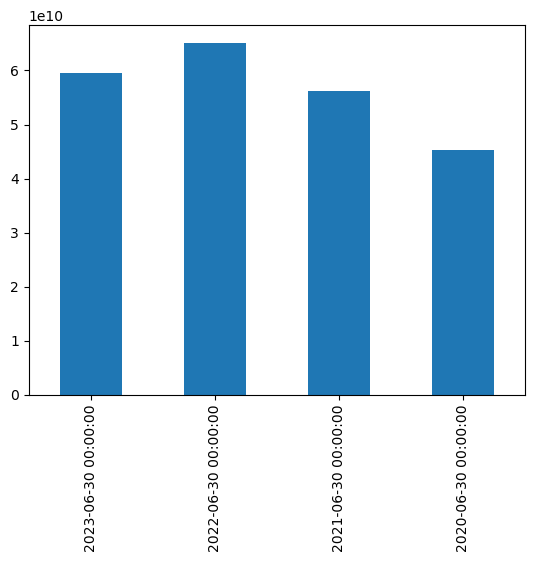

In [18]:
msft_cf.loc['FreeCashFlow'].plot(kind='bar')

<Axes: >

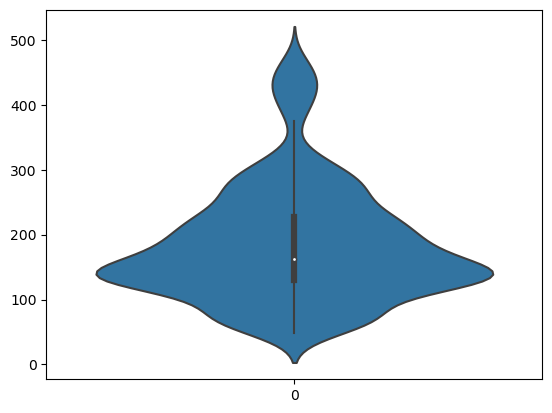

In [19]:
sns.violinplot(df2['Adj Close']['NVDA'])

In [20]:
df2['Adj Close']['NVDA']

Date
2020-01-02     59.754219
2020-01-03     58.797791
2020-01-06     59.044369
2020-01-07     59.759197
2020-01-08     59.871277
                 ...    
2023-08-09    425.540009
2023-08-10    423.880005
2023-08-11    408.549988
2023-08-14    437.529999
2023-08-15    439.399994
Name: NVDA, Length: 911, dtype: float64

In [ ]:
symbol = 'TSLA'
start_date = '2020-01-01'
end_date = datetime.date.today()

symbol_list = ['TSLA']

df1 = get_yf_hist(symbol_list=symbol_list,startDate=start_date,endDate=end_date,interval='1d')